In [36]:
from sklearn import datasets
import pandas as pd

%matplotlib inline

# Build a model

In [35]:


ds = datasets.load_breast_cancer();
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state = 1960)
NC = 12

X = ds.data[:,0:NC]
y = ds.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1960)

clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1960,
            splitter='best')

# Decision Tree Plot

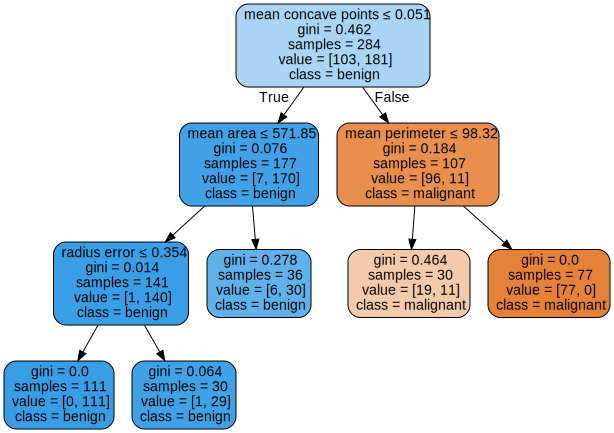

In [38]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=ds.feature_names[0:NC],  
                         class_names=ds.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


# sklearn_explain approach

In [34]:
# Explain the score = ln(p(1) / (1 - p(1)))


import sklearn_explain.explainer as expl
lExplainer = expl.cModelScoreExplainer(clf)
lExplainer.mSettings.mFeatureNames = ds.feature_names[0:NC]
lExplainer.mSettings.mExplanationOrder = 1
    
lExplainer.fit(X_train)
df_rc = lExplainer.explain(X_test)

print(df_rc.columns)


USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
CONST_SCORE_DETECTIOM -11.5129154649 11.5129154649 False
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
USING_PROBABILITY_AS_SCORE
NON_USED_FEATURES ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'texture error']
USED_FEATURES ['mean perimeter', 'mean area', 'mean concave points', 'radius error']
USING_PROBABILITY_AS_SCORE
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'Score', 'BinnedScore',
       'mean per

In [19]:
df_rc_2 = lExplainer.explain(X_test[0].reshape(1, -1))

USING_PROBABILITY_AS_SCORE


In [20]:
X_test[0].reshape(1, -1)

array([[  1.17600000e+01,   2.16000000e+01,   7.47200000e+01,
          4.27900000e+02,   8.63700000e-02,   4.96600000e-02,
          1.65700000e-02,   1.11500000e-02,   1.49500000e-01,
          5.88800000e-02,   4.06200000e-01,   1.21000000e+00]])

In [21]:
df_rc_2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,reason_3,reason_4,reason_1_idx,detailed_reason_1,reason_2_idx,detailed_reason_2,reason_3_idx,detailed_reason_3,reason_4_idx,detailed_reason_4
0,11.76,21.6,1,1,0.08637,0.04966,0.01657,0,0.1495,0.05888,...,mean perimeter,radius error,1,[(387.1 < 'mean area' <= 477.3)],2,[('mean concave points' <= 0.017368)],0,[(71.884 < 'mean perimeter' <= 80.624)],3,[(0.36444 < 'radius error' <= 0.55352)]


In [22]:
df_rc_2[[col for col in df_rc_2.columns if col.startswith('detailed')]]

,detailed_reason_1,detailed_reason_2,detailed_reason_3,detailed_reason_4
0,[(387.1 < 'mean area' <= 477.3)],[('mean concave points' <= 0.017368)],[(71.884 < 'mean perimeter' <= 80.624)],[(0.36444 < 'radius error' <= 0.55352)]


                                   0
mean area_Effect            0.759265
mean concave points_Effect  0.515169
mean perimeter_Effect       0.013671
radius error_Effect        -0.027322


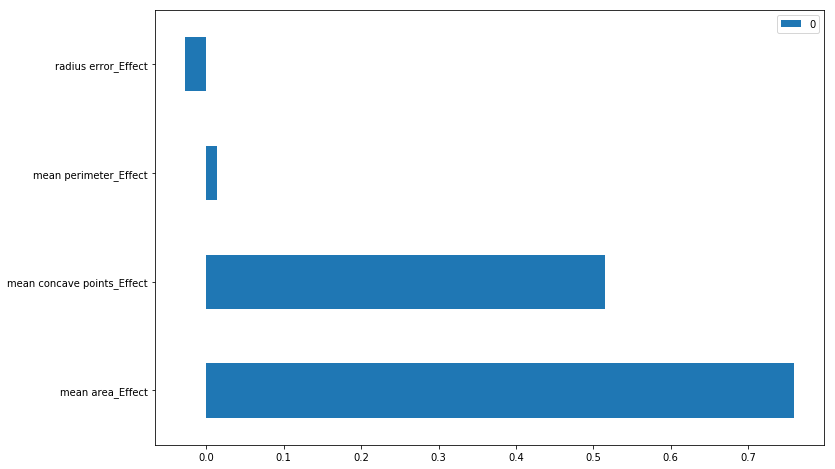

In [23]:
transposed = df_rc_2[effects].transpose()
sorted_rc = transposed.sort_values(by=transposed.columns[0] , ascending=False)
print(sorted_rc.head())
sorted_rc.plot.barh(figsize=(12,8))
